# Doctor's Consultation Fees Prediction

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.?

# Importing Data

In [1]:
import pandas as pd
Final_Train=pd.read_excel("Final_Train.xlsx") #reading Final_Train.xlsx file
Final_Train.head() #Looking into top 5 rows

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [2]:
Final_Train.shape #Checking the shape of our data

(5961, 7)

# Identifing the type of Problem

In [3]:
Final_Train.dtypes #Checking the datatype of each attribute

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

Fees: Fees charged by the doctor (Target Variable) is int64 

# Exploratory Data Analysis

## Handling Null Values

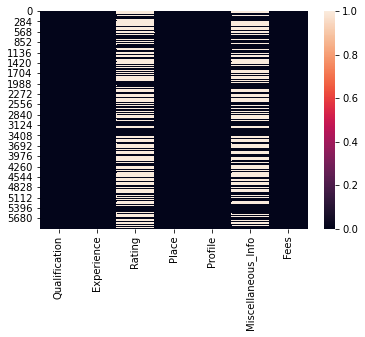

In [4]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.heatmap(Final_Train.isnull()) #Looking for null values if any, in heatmap

In [5]:
#Checking null values in Place
Final_Train['Place'].isnull().value_counts()

False    5936
True       25
Name: Place, dtype: int64

We can see clearly that there are 25 null vlaues present in Place column

In [6]:
#Finding mode of Place column
Final_Train['Place'].mode()

0    HSR Layout, Bangalore
dtype: object

In [7]:
#Replacing null values of Place column with HSR Layout, Banglore
import numpy as np
Final_Train['Place']=Final_Train['Place'].replace(np.NaN,'HSR Layout, Bangalore')

In [8]:
#Seprating Location and city from Place column
Final_Train['locality'] = Final_Train['Place'].str.split(",").str[0]
Final_Train['city'] = Final_Train['Place'].str.split(",").str[1]

#Replacing Null cities with Banglore and Locality with HSR Layout
Final_Train['locality']=Final_Train['locality'].replace(np.NaN,' HSR Layout')
Final_Train['city']=Final_Train['city'].replace(np.NaN,' Bangalore')
#Lokks like e is nothing but Ernakulam
Final_Train["city"]=Final_Train["city"].replace("e"," Ernakulam")

#Now we can drop the place variable
Final_Train.drop('Place',axis=1,inplace=True)

In [9]:
Final_Train["city"].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', ' Sector 5'],
      dtype=object)

In [10]:
#Checking null values with Rating column
Final_Train['Rating'].isnull().value_counts()

True     3302
False    2659
Name: Rating, dtype: int64

We can clearly that there are more than 2k null values present in Rating Column

In [11]:
# Fill missing values with 100%.
Final_Train['Rating'].fillna('0%',inplace=True)

# extract value of rating to avoid '%' and convert to numeric
Final_Train['Rating'] = Final_Train['Rating'].str.slice(stop=-1).astype(int)

In [12]:
#Droping Miscellaneous_Info because we already extract useful information
Final_Train.drop('Miscellaneous_Info', axis=1, inplace=True)

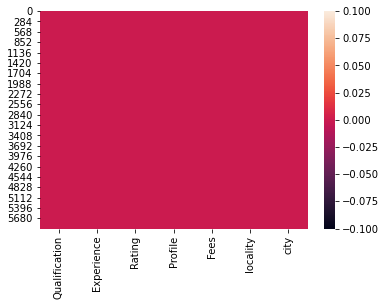

In [13]:
sns.heatmap(Final_Train.isnull()) #Looking for null values if any, in heatmap

In [14]:
Final_Train['Experience'] = Final_Train['Experience'].str.split().str[0]
Final_Train['Experience'] = Final_Train['Experience'].astype(int)

In [15]:
Final_Train.head()

,Qualification,Experience,Rating,Profile,Fees,locality,city
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,0,ENT Specialist,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,0,Ayurveda,250,Bannerghatta Road,Bangalore
4,BAMS,20,100,Ayurveda,250,Keelkattalai,Chennai


## Univariate Analysis

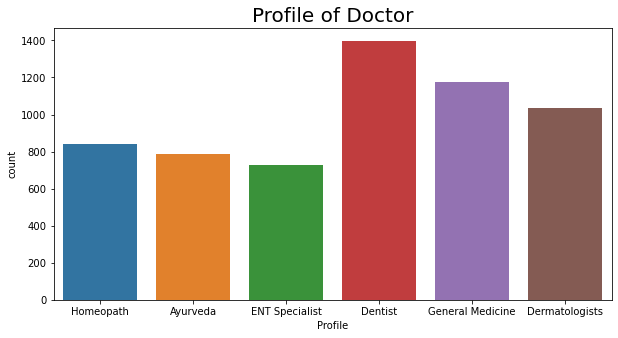

In [16]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (10,5))
sns.countplot(x="Profile", data=Final_Train)
plt.title("Profile of Doctor", fontsize = 20)
plt.show()

Most number of peoples are Dentist.

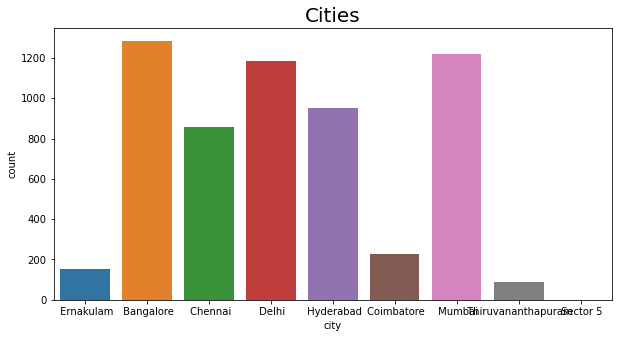

In [17]:
plt.figure(figsize = (10,5))
sns.countplot(x="city", data=Final_Train)
plt.title("Cities", fontsize = 20)
plt.show()

Banglore, Mumbai and Delhi are the cities where docotrs see patients.

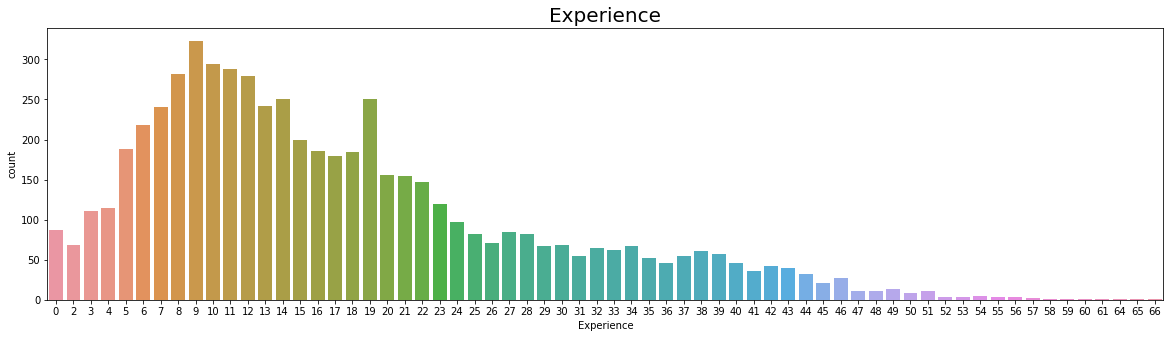

In [18]:
plt.figure(figsize = (20,5))
sns.countplot(x="Experience", data=Final_Train)
plt.title("Experience", fontsize = 20)
plt.show()

Most of the doctors have 5-25 years of experience.

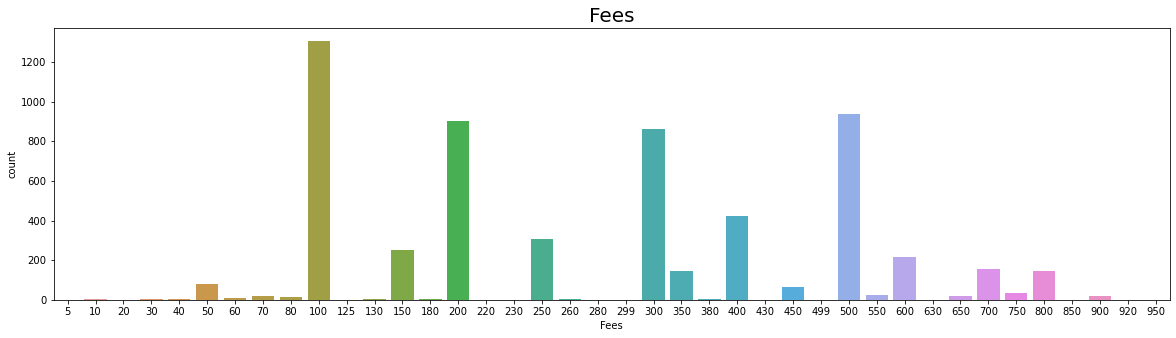

In [19]:
plt.figure(figsize = (20,5))
sns.countplot(x="Fees", data=Final_Train)
plt.title("Fees", fontsize = 20)
plt.show()

Doctors change mostly 100,150,200,250,300,400 and 500 rupees

# Bi-variate Analysis

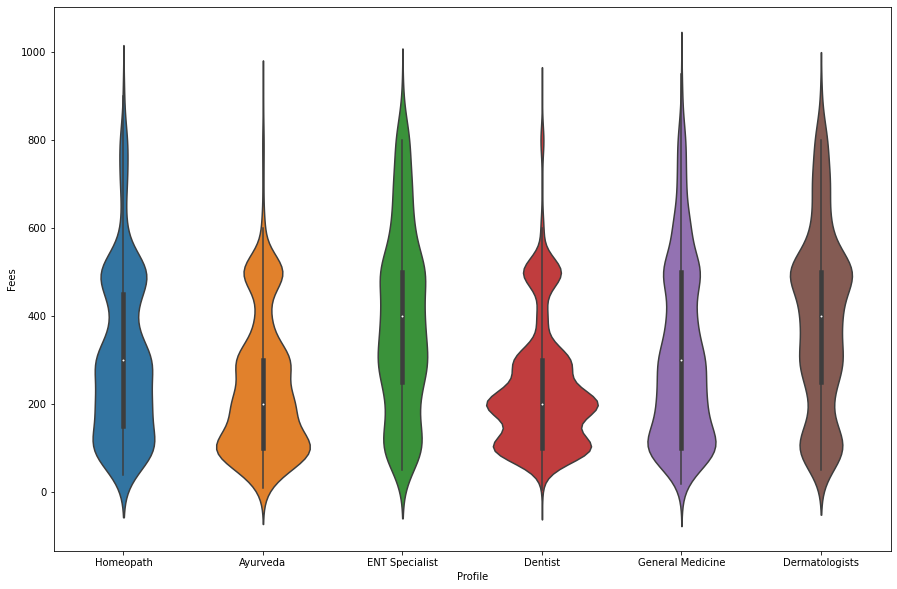

In [20]:
plt.figure(figsize=(15,10))
sns.violinplot(x='Profile', y='Fees', data= Final_Train)

Here we can clearly see Homeopath, Ayurveda, Dentist fees is mostly lesser than 600 ruppes, only few peeople charged more than 600.

Where as ENT Specialist, General Medicine and Dermatologists have many peoples who got chnaged near 800 and more.

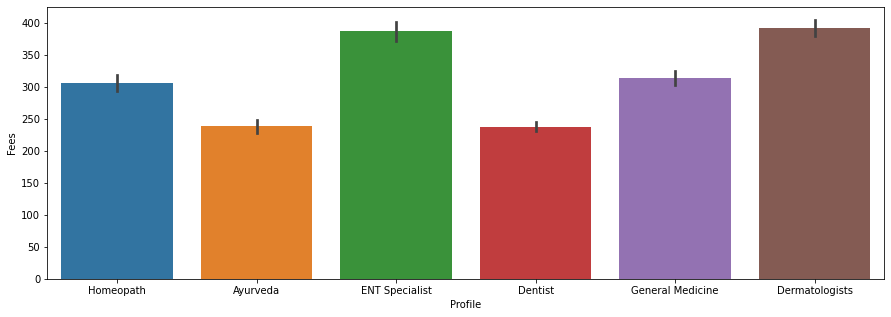

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'Profile', y = 'Fees', data = Final_Train)

ENT Specialist and Dermatologists Doctors charges more than 400 rupees

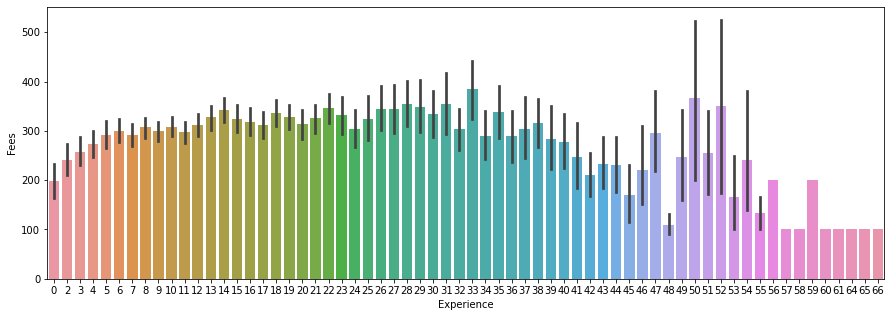

In [22]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'Experience', y = 'Fees', data = Final_Train)

51 and 53 year experience doctors are earning more than other doctors 

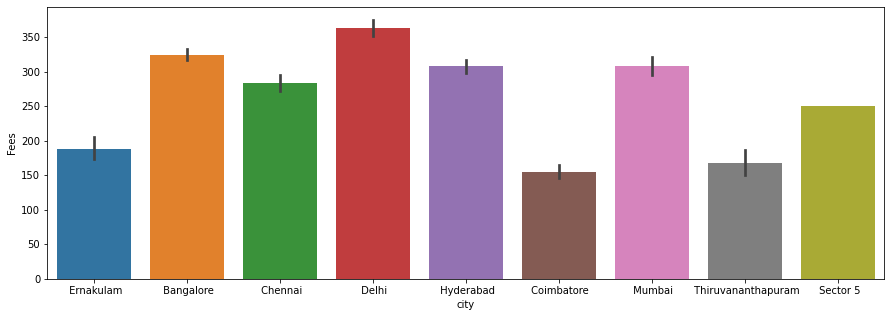

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'city', y = 'Fees', data = Final_Train)

Delhi city doctors are earning more than 350 and it's heighst.

# Label Encoding

In [24]:
label_list=list(Final_Train.select_dtypes(['object']).columns) #Getting the list of object columns in label_list 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() #initilizing Label Encoder
for i in label_list:
    Final_Train[i] = le.fit_transform(Final_Train[i]) #Converting Object coulmns to number's using label encoder

## Multi-Variate Analysis

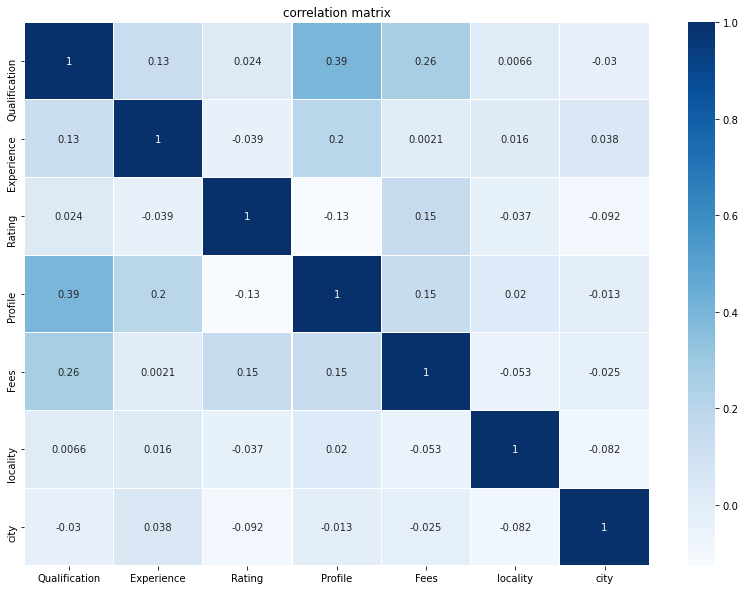

In [25]:
fig=plt.figure(figsize=(14,10))
hc=Final_Train.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues",linewidths=.1, annot_kws={"size": 10})
plt.title("correlation matrix")
plt.show()

Their is no much correlation with Fees but still Qualification have 26% correlation with fees

# Removing Outliers and Skewness

In [27]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(Final_Train))
print(np.where(z>3))

(array([ 105,  110,  183,  275,  293,  325,  372,  901,  987, 1009, 1111,
       1314, 1631, 1860, 1981, 2023, 2062, 2165, 2202, 2252, 2262, 2281,
       2393, 2428, 2522, 2623, 2631, 2708, 3180, 3365, 3478, 3493, 3608,
       3942, 3960, 4040, 4167, 4212, 4257, 4344, 4581, 4730, 4763, 4775,
       4835, 5195, 5250, 5265, 5277, 5311, 5410, 5422, 5587, 5637, 5664,
       5720, 5807, 5942], dtype=int64), array([1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 1, 4, 4, 1, 1, 1, 1, 4, 1, 4, 1, 1,
       4, 4, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1,
       4, 4, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))


In [28]:
#Removing the outliers
import scipy
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(Final_Train))
threshold=3
new_Final_Train=Final_Train[(z<3).all(axis=1)]
print(Final_Train.shape)
print(new_Final_Train.shape)

(5961, 7)
(5903, 7)


In [29]:
#checking for how much data we lost
loss_percent=(5961-5903)/5961*100
print(loss_percent)

0.9729911088743499


We almost 1 percent of data, which is not bad.

In [30]:
#Removing outliers from non object columns
Label1 = ['Experience','Rating']
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in Label1:
    if abs(new_Final_Train.loc[:,i].skew())>0.5:
        new_Final_Train.loc[:,i]=PT.fit_transform(new_Final_Train.loc[:,i].values.reshape(-1,1))

In [31]:
new_Final_Train.skew()

Qualification    0.246857
Experience      -0.005040
Rating           0.240969
Profile          0.121336
Fees             0.710445
locality         0.124171
city             0.052925
dtype: float64

We can clearly see Skewness in not present in the data

In [32]:
new_Final_Train.head()

,Qualification,Experience,Rating,Profile,Fees,locality,city
0,401,0.764737,100,5,100,296,4
1,73,-0.320308,98,0,350,855,0
2,1135,-0.687451,0,3,300,452,0
3,464,-0.320308,0,0,250,68,0
4,10,0.449495,100,0,250,335,1


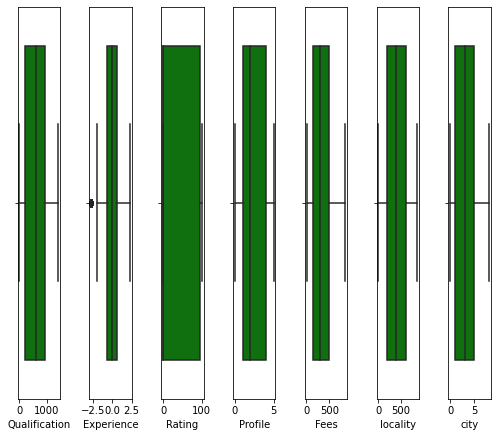

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns  #Visualising the outliers
collist=new_Final_Train.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(new_Final_Train[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Seperating Input and Output Variables

In [34]:
x = new_Final_Train.drop("Fees", axis=1)
y = new_Final_Train["Fees"]

# Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
scale_x=SC.fit_transform(x)
#Setting up the coulumns after Scaling
scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head() #Priting top 5 rows of our data

,Qualification,Experience,Rating,Profile,locality,city
0,-0.468623,0.764737,1.216981,1.547726,-0.445550,0.405437
1,-1.259893,-0.320308,1.174750,-1.466138,1.745575,-1.312651
2,1.302084,-0.687451,-0.894577,0.342181,0.165927,-1.312651
3,-0.316642,-0.320308,-0.894577,-1.466138,-1.339247,-1.312651
4,-1.411875,0.449495,1.216981,-1.466138,-0.292681,-0.883129


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler() #Initializting MinMaxScaler
new = scale.fit(x)  #fitting our data into MinMaxScaller
scale_x = new.transform(x) #Transforming the data
#Setting up the coulumns after Scaling
scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head() #Priting top 5 rows of our data

# Finding Best Random State

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.12596687068580636  on Random_state  788


# Train Test Split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Finding Best Algorithm

In [38]:
#importing all the required libraries to find best Algorithm
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [39]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]
for m in model:
    print("*******************************************************************************")
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print('accuracy score of ->', m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred)))
    score=cross_val_score(m,x,y,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,pred)-abs(score.mean()))
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("*******************************************************************************")

*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> LinearRegression()
R2 Score:                 0.12596687068580636
Mean Absolute Error:      144.9402024492207
Mean Squared error:       31762.667798153947
Root Mean Squared Error:  178.22083996590845
[0.09448527 0.13118277 0.05765927 0.11290294 0.08259836 0.08928563
 0.08929214 0.11118729]
cross validation score:   0.09607420879448712
Difference between R2 score and cross validatio score is -  0.02989266189131924
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
*******************************************************************************
*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> RandomForestRegressor()
R2 Score:                 0.2212713002

Gradient Boosting Regressor have the heighst Accuracy and cross validation Score i.e. 24.25%

# Hyper Parameter Tuning

In [40]:
import time
start_time = time.time()
from sklearn.model_selection import GridSearchCV
GBR=GradientBoostingRegressor()
param_grid = { 
    'loss': ['ls', 'lad', 'huber', 'quantile'],
    'n_estimators' : [5,10,20,30,40,50,100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['mse','friedman_mse']
}

clf = GridSearchCV(estimator = GBR, param_grid = param_grid, cv = 5)
clf.fit(x_train,y_train)
print("--- %s seconds ---" % (time.time() - start_time))
clf.best_params_  #Best parameters

--- 123.5232400894165 seconds ---


{'criterion': 'mse', 'loss': 'ls', 'max_features': 'sqrt', 'n_estimators': 200}

In [41]:
clf_pred=clf.best_estimator_.predict(x_test)

In [42]:
r2_score(y_test, clf_pred)

0.25091241365547134

Our model learnt Almost 25% which is too low.

# Saving the model

In [43]:
import joblib
joblib.dump(clf.best_estimator_,"PJ4_Doctor.obj")
RF_from_joblib=joblib.load('PJ4_Doctor.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([289.8490603 , 473.60715299, 255.71074518, ..., 168.31732753,
       386.30171914, 209.89226504])

In [44]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

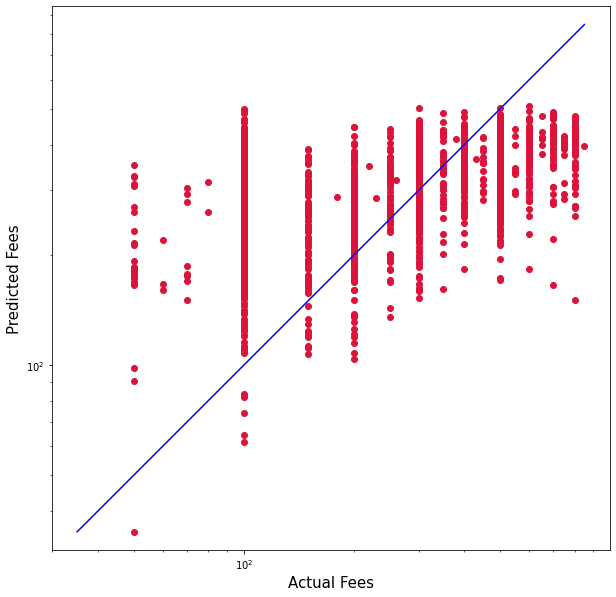

In [45]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predicted), max(y_test))
p2 = min(min(Predicted), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Fees', fontsize=15)
plt.ylabel('Predicted Fees', fontsize=15)
plt.axis('equal')
plt.show()

# Test Data

In [46]:
Final_Test=pd.read_excel("Final_Test.xlsx") #reading Final_Test.xlsx file
Final_Test.head() #Looking into top 5 rows

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [47]:
Final_Test['Place']=Final_Test['Place'].replace(np.NaN,'HSR Layout, Bangalore')

In [48]:
#Seprating Location and city from Place column
Final_Test['locality'] = Final_Test['Place'].str.split(",").str[0]
Final_Test['city'] = Final_Test['Place'].str.split(",").str[1]

#Replacing Null cities with Banglore and Locality with HSR Layout
Final_Test['locality']=Final_Test['locality'].replace(np.NaN,' HSR Layout')
Final_Test['city']=Final_Test['city'].replace(np.NaN,' Bangalore')
#Lokks like e is nothing but Ernakulam
Final_Test["city"]=Final_Test["city"].replace("e"," Ernakulam")

#Now we can drop the place variable
Final_Test.drop('Place',axis=1,inplace=True)

In [49]:
# Fill missing values with 100%.
Final_Test['Rating'].fillna('0%',inplace=True)

# extract value of rating to avoid '%' and convert to numeric
Final_Test['Rating'] = Final_Test['Rating'].str.slice(stop=-1).astype(int)

In [50]:
#Droping Miscellaneous_Info because we already extract useful information
Final_Test.drop('Miscellaneous_Info', axis=1, inplace=True)

In [51]:
Final_Test['Experience'] = Final_Test['Experience'].str.split().str[0]
Final_Test['Experience'] = Final_Test['Experience'].astype(int)

In [53]:
Final_Test.head()

,Qualification,Experience,Rating,Profile,locality,city
0,MBBS,35,0,General Medicine,Ghatkopar East,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0,ENT Specialist,West Marredpally,Hyderabad
2,"MBBS, DDVL",40,70,Dermatologists,KK Nagar,Chennai
3,BAMS,0,0,Ayurveda,New Ashok Nagar,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,Dentist,Kanakpura Road,Bangalore


In [54]:
label_list=list(Final_Test.select_dtypes(['object']).columns) #Getting the list of object columns in label_list 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() #initilizing Label Encoder
for i in label_list:
    Final_Test[i] = le.fit_transform(Final_Test[i]) #Converting Object coulmns to number's using label encoder

In [57]:
z=np.abs(zscore(Final_Test))
print(np.where(z>3))

(array([ 104,  258,  264,  398,  617,  641,  992, 1246, 1284, 1297, 1337],
      dtype=int64), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))


In [58]:
z=np.abs(zscore(Final_Test))
threshold=3
new_Final_Test=Final_Test[(z<3).all(axis=1)]
print(Final_Test.shape)
print(new_Final_Test.shape)

(1987, 6)
(1976, 6)


In [60]:
#Removing outliers from non object columns
Label1 = ['Experience','Rating']
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in Label1:
    if abs(new_Final_Test.loc[:,i].skew())>0.5:
        new_Final_Test.loc[:,i]=PT.fit_transform(new_Final_Test.loc[:,i].values.reshape(-1,1))

In [61]:
new_Final_Test.head()

,Qualification,Experience,Rating,Profile,locality,city
0,241,1.432105,0,4,142,6
1,340,1.185222,0,3,577,5
2,258,1.717909,70,2,212,1
3,6,-2.754710,0,0,373,3
4,79,0.033508,100,1,231,0


In [62]:
x=new_Final_Test

In [63]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
scale_x=SC.fit_transform(x)
#Setting up the coulumns after Scaling
scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head() #Priting top 5 rows of our data

,Qualification,Experience,Rating,Profile,locality,city
0,-0.100314,1.432105,-0.900960,0.901460,-0.845269,1.315350
1,0.432047,1.185222,-0.900960,0.297430,1.666935,0.874745
2,-0.008899,1.717909,0.579554,-0.306600,-0.441006,-0.887678
3,-1.364001,-2.754710,-0.900960,-1.514661,0.488798,-0.006466
4,-0.971452,0.033508,1.214060,-0.910631,-0.331278,-1.328283


In [64]:
Predicted = RF_from_joblib.predict(x)
Predicted

array([290.71914269, 308.01261906, 320.92205592, ..., 339.45022978,
       232.70989349, 338.50496367])